## **ALIGN GUARD INTERNSHIP TASK**

**Heart Disease prediction**

* Created By : Aditi Singh
* Created On: 31.05.2024



---


# *Importing  the libraries*

In [ ]:
!pip install polars

In [ ]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# *Loading the Dataset*

* The Cleveland Heart Disease Dataset, sourced from the UCI Machine Learning Repository, comprises 303 instances with 14 attributes, including demographic information, clinical indicators, and medical test results, culminating in the target variable indicating the presence or absence of heart disease. With a mix of numerical and categorical features, this dataset serves as a fundamental resource for predictive modeling and classification tasks in cardiovascular health. Researchers leverage its attributes to develop machine learning models capable of predicting heart disease likelihood, aiding in diagnostic and preventive strategies. Despite its utility, ensuring data quality through meticulous handling of missing values and outliers is imperative for accurate analysis and model performance

Attribute Information:
* age: Age of the patient (in years)
* sex: Gender of the patient (0 = female, 1 = male)
* cp: Chest pain type (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
* trestbps: Resting blood pressure (in mm Hg)
* chol: Serum cholesterol level (in mg/dl)
* fbs: Fasting blood sugar > 120 mg/dl (0 = false, 1 = true)
* restecg: Resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality, Value 2: showing probable or definite left ventricular hypertrophy)
* thalach: Maximum heart rate achieved
* exang: Exercise-induced angina (0 = no, 1 = yes)
* oldpeak: ST depression induced by exercise relative to rest
* slope: Slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: Number of major vessels colored by fluoroscopy (0-3)
* thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
* target: Presence of heart disease (0 = no, 1 = yes)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
# Read the data using Polars, initially as strings to handle '?'
data = pl.read_csv(url, has_header=False, new_columns=names, dtypes=[pl.Utf8]*len(names))
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""63.0""","""1.0""","""1.0""","""145.0""","""233.0""","""1.0""","""2.0""","""150.0""","""0.0""","""2.3""","""3.0""","""0.0""","""6.0""","""0"""
"""67.0""","""1.0""","""4.0""","""160.0""","""286.0""","""0.0""","""2.0""","""108.0""","""1.0""","""1.5""","""2.0""","""3.0""","""3.0""","""2"""
"""67.0""","""1.0""","""4.0""","""120.0""","""229.0""","""0.0""","""2.0""","""129.0""","""1.0""","""2.6""","""2.0""","""2.0""","""7.0""","""1"""
"""37.0""","""1.0""","""3.0""","""130.0""","""250.0""","""0.0""","""0.0""","""187.0""","""0.0""","""3.5""","""3.0""","""0.0""","""3.0""","""0"""
"""41.0""","""0.0""","""2.0""","""130.0""","""204.0""","""0.0""","""2.0""","""172.0""","""0.0""","""1.4""","""1.0""","""0.0""","""3.0""","""0"""
"""56.0""","""1.0""","""2.0""","""120.0""","""236.0""","""0.0""","""0.0""","""178.0""","""0.0""","""0.8""","""1.0""","""0.0""","""3.0""","""0"""
"""62.0""","""0.0""","""4.0""","""140.0""","""268.0""","""0.0""","""2.0""","""160.0""","""0.0""","""3.6""","""3.0""","""2.0""","""3.0""","""3"""
"""57.0""","""0.0""","""4.0""","""120.0""","""354.0""","""0.0""","""0.0""","""163.0""","""1.0""","""0.6""","""1.0""","""0.0""","""3.0""","""0"""
"""63.0""","""1.0""","""4.0""","""130.0""","""254.0""","""0.0""","""2.0""","""147.0""","""0.0""","""1.4""","""2.0""","""1.0""","""7.0""","""2"""


 **Replace missing values indicated by '?' with NaN**

In [ ]:
# Replace missing values indicated by '?' with None
data = data.with_columns([
    pl.when(pl.col(col) == '?').then(None).otherwise(pl.col(col)).alias(col)
    for col in names])
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""63.0""","""1.0""","""1.0""","""145.0""","""233.0""","""1.0""","""2.0""","""150.0""","""0.0""","""2.3""","""3.0""","""0.0""","""6.0""","""0"""
"""67.0""","""1.0""","""4.0""","""160.0""","""286.0""","""0.0""","""2.0""","""108.0""","""1.0""","""1.5""","""2.0""","""3.0""","""3.0""","""2"""
"""67.0""","""1.0""","""4.0""","""120.0""","""229.0""","""0.0""","""2.0""","""129.0""","""1.0""","""2.6""","""2.0""","""2.0""","""7.0""","""1"""
"""37.0""","""1.0""","""3.0""","""130.0""","""250.0""","""0.0""","""0.0""","""187.0""","""0.0""","""3.5""","""3.0""","""0.0""","""3.0""","""0"""
"""41.0""","""0.0""","""2.0""","""130.0""","""204.0""","""0.0""","""2.0""","""172.0""","""0.0""","""1.4""","""1.0""","""0.0""","""3.0""","""0"""
"""56.0""","""1.0""","""2.0""","""120.0""","""236.0""","""0.0""","""0.0""","""178.0""","""0.0""","""0.8""","""1.0""","""0.0""","""3.0""","""0"""
"""62.0""","""0.0""","""4.0""","""140.0""","""268.0""","""0.0""","""2.0""","""160.0""","""0.0""","""3.6""","""3.0""","""2.0""","""3.0""","""3"""
"""57.0""","""0.0""","""4.0""","""120.0""","""354.0""","""0.0""","""0.0""","""163.0""","""1.0""","""0.6""","""1.0""","""0.0""","""3.0""","""0"""
"""63.0""","""1.0""","""4.0""","""130.0""","""254.0""","""0.0""","""2.0""","""147.0""","""0.0""","""1.4""","""2.0""","""1.0""","""7.0""","""2"""


**Convert data types to numeric**

In [ ]:
# Convert data types to numeric
data = data.with_columns([
    pl.col(col).cast(pl.Float64) for col in names
])


In [ ]:
# Finding Duplicates
duplicates = data.filter(data.is_duplicated())
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
shape: (0, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64 ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘


In [ ]:
irrelevant_columns = ['oldpeak']
df = data.drop(columns=irrelevant_columns)
df

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0.0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2.0
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1.0
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0.0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0.0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,1.0,0.0,3.0,0.0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.0,2.0,3.0,3.0
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,1.0,0.0,3.0,0.0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,2.0,1.0,7.0,2.0


In [ ]:
# Data type Mismatch
mismatched_data = {col: data[col].is_null().sum() for col in names if data[col].dtype != pl.Float64}
print("Data Type Mismatch Columns:")
print(mismatched_data)


Data Type Mismatch Columns:
{}


In [ ]:
# Data Formatting
formatted_data = data.with_columns([
    pl.col(col).cast(pl.Float64) for col in names
])
print("Formatted Data:")
print(formatted_data)

Formatted Data:
shape: (303, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬──────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca   ┆ thal ┆ target │
│ ---  ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---    │
│ f64  ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64  ┆ f64  ┆ f64    │
╞══════╪═════╪═════╪══════════╪═══╪═══════╪══════╪══════╪════════╡
│ 63.0 ┆ 1.0 ┆ 1.0 ┆ 145.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 6.0  ┆ 0.0    │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 160.0    ┆ … ┆ 2.0   ┆ 3.0  ┆ 3.0  ┆ 2.0    │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 120.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 1.0    │
│ 37.0 ┆ 1.0 ┆ 3.0 ┆ 130.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 3.0  ┆ 0.0    │
│ …    ┆ …   ┆ …   ┆ …        ┆ … ┆ …     ┆ …    ┆ …    ┆ …      │
│ 68.0 ┆ 1.0 ┆ 4.0 ┆ 144.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 2.0    │
│ 57.0 ┆ 1.0 ┆ 4.0 ┆ 130.0    ┆ … ┆ 2.0   ┆ 1.0  ┆ 7.0  ┆ 3.0    │
│ 57.0 ┆ 0.0 ┆ 2.0 ┆ 130.0    ┆ … ┆ 2.0   ┆ 1.0  ┆ 3.0  ┆ 1.0    │
│ 38.0 ┆ 1.0 ┆ 3.0 ┆ 138.0    ┆ … ┆ 1.0   ┆ null ┆ 3.0  ┆ 0.0    │
└──────┴─────┴─────┴─────────

In [ ]:
# Finding Missing Values
missing_values = data.select([pl.col(col).is_null().sum().alias(col) for col in names])
print("Missing Values:")
print(missing_values)

Missing Values:
shape: (1, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ u32 ┆ u32 ┆ u32 ┆ u32      ┆   ┆ u32   ┆ u32 ┆ u32  ┆ u32    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
│ 0   ┆ 0   ┆ 0   ┆ 0        ┆ … ┆ 0     ┆ 4   ┆ 2    ┆ 0      │
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘


In [ ]:
# Finding Null Values
null_values = data.select([pl.col(col).null_count().alias(col) for col in names])
print("Null Values:")
print(null_values)

Null Values:
shape: (1, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ u32 ┆ u32 ┆ u32 ┆ u32      ┆   ┆ u32   ┆ u32 ┆ u32  ┆ u32    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
│ 0   ┆ 0   ┆ 0   ┆ 0        ┆ … ┆ 0     ┆ 4   ┆ 2    ┆ 0      │
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘


In [ ]:
# Finding Outliers
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df.filter((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

outliers = {col: find_outliers(data, col) for col in names}
print("Outliers:")
print(outliers)

Outliers:
{'age': shape: (0, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64 ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘, 'sex': shape: (0, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64 ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘, 'cp': shape: (23, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ ---  ┆ 

In [ ]:
# Finding any Bias and Mitigate it
gender_bias = data.filter(pl.col('sex').is_not_null()).group_by('sex').agg(pl.col('age').mean())
print("Gender Bias in Age Distribution:")
print(gender_bias)

min_count = data.filter(pl.col('sex').is_not_null()).group_by('sex').count().select(pl.col('count')).min()
min_count_value = min_count.to_numpy().item()
balanced_data = data.filter(pl.col('sex') == 0).sample(n=min_count_value).vstack(data.filter(pl.col('sex') == 1).sample(n=min_count_value))
print("Balanced Data:")
print(balanced_data)

Gender Bias in Age Distribution:
shape: (2, 2)
┌─────┬───────────┐
│ sex ┆ age       │
│ --- ┆ ---       │
│ f64 ┆ f64       │
╞═════╪═══════════╡
│ 1.0 ┆ 53.834951 │
│ 0.0 ┆ 55.721649 │
└─────┴───────────┘
Balanced Data:
shape: (194, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ ---  ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64  ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞══════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
│ 41.0 ┆ 0.0 ┆ 2.0 ┆ 130.0    ┆ … ┆ 1.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ 62.0 ┆ 0.0 ┆ 4.0 ┆ 140.0    ┆ … ┆ 3.0   ┆ 2.0 ┆ 3.0  ┆ 3.0    │
│ 57.0 ┆ 0.0 ┆ 4.0 ┆ 120.0    ┆ … ┆ 1.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ 56.0 ┆ 0.0 ┆ 2.0 ┆ 140.0    ┆ … ┆ 2.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ …    ┆ …   ┆ …   ┆ …        ┆ … ┆ …     ┆ …   ┆ …    ┆ …      │
│ 44.0 ┆ 1.0 ┆ 3.0 ┆ 130.0    ┆ … ┆ 1.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ 41.0 ┆ 1.0 ┆ 2.0 ┆ 135.0    ┆ … ┆

**Basic information about the Dataset**

In [ ]:
print("Basic Information about the Dataset:")
print(data.describe())


Basic Information about the Dataset:
shape: (9, 15)
┌────────────┬───────────┬──────────┬──────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ describe   ┆ age       ┆ sex      ┆ cp       ┆ … ┆ slope    ┆ ca       ┆ thal     ┆ target   │
│ ---        ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64       ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪═══════════╪══════════╪══════════╪═══╪══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 303.0     ┆ 303.0    ┆ 303.0    ┆ … ┆ 303.0    ┆ 299.0    ┆ 301.0    ┆ 303.0    │
│ null_count ┆ 0.0       ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0      ┆ 4.0      ┆ 2.0      ┆ 0.0      │
│ mean       ┆ 54.438944 ┆ 0.679868 ┆ 3.158416 ┆ … ┆ 1.60066  ┆ 0.672241 ┆ 4.734219 ┆ 0.937294 │
│ std        ┆ 9.038662  ┆ 0.467299 ┆ 0.960126 ┆ … ┆ 0.616226 ┆ 0.937438 ┆ 1.939706 ┆ 1.228536 │
│ min        ┆ 29.0      ┆ 0.0      ┆ 1.0      ┆ … ┆ 1.0      ┆ 0.0      ┆ 

#*Univariate Analysis*
* **For numerical variables**

In [ ]:
# Univariate Analysis for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print(data.describe())


Descriptive Statistics for Numerical Variables:
shape: (9, 15)
┌────────────┬───────────┬──────────┬──────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ describe   ┆ age       ┆ sex      ┆ cp       ┆ … ┆ slope    ┆ ca       ┆ thal     ┆ target   │
│ ---        ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64       ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪═══════════╪══════════╪══════════╪═══╪══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 303.0     ┆ 303.0    ┆ 303.0    ┆ … ┆ 303.0    ┆ 299.0    ┆ 301.0    ┆ 303.0    │
│ null_count ┆ 0.0       ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0      ┆ 4.0      ┆ 2.0      ┆ 0.0      │
│ mean       ┆ 54.438944 ┆ 0.679868 ┆ 3.158416 ┆ … ┆ 1.60066  ┆ 0.672241 ┆ 4.734219 ┆ 0.937294 │
│ std        ┆ 9.038662  ┆ 0.467299 ┆ 0.960126 ┆ … ┆ 0.616226 ┆ 0.937438 ┆ 1.939706 ┆ 1.228536 │
│ min        ┆ 29.0      ┆ 0.0      ┆ 1.0      ┆ … ┆ 1.0      ┆ 

*  **Visualize the distribution of numerical variables**

Text(0.5, 1.0, 'Distribution of Age')

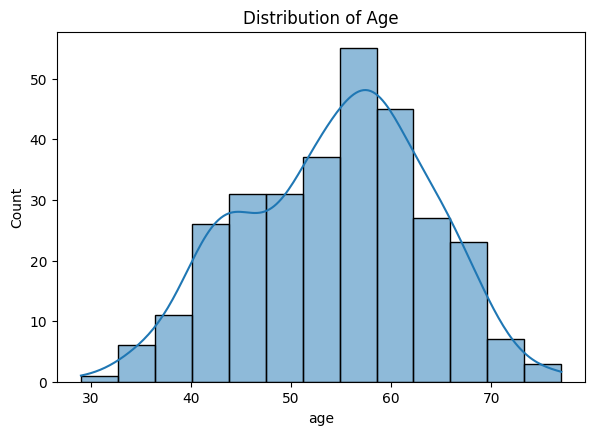

In [ ]:
# Visualize the distribution of numerical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['age'].to_pandas(), kde=True)
plt.title('Distribution of Age')


Text(0.5, 1.0, 'Distribution of Resting Blood Pressure')

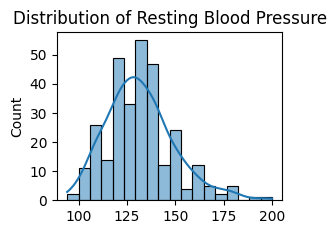

In [ ]:
plt.subplot(2, 2, 2)
sns.histplot(data['trestbps'], kde=True)
plt.title('Distribution of Resting Blood Pressure')

Text(0.5, 1.0, 'Distribution of Cholesterol')

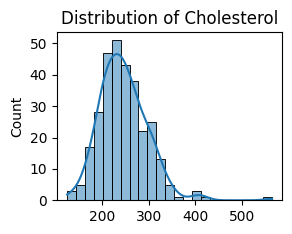

In [ ]:
plt.subplot(2, 2, 3)
sns.histplot(data['chol'], kde=True)
plt.title('Distribution of Cholesterol')

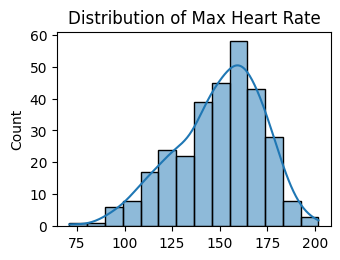

In [ ]:
plt.subplot(2, 2, 4)
sns.histplot(data['thalach'], kde=True)
plt.title('Distribution of Max Heart Rate')
plt.tight_layout()
plt.show()


# *For categorical variables*
* **Display frequency tables**

In [ ]:
print("Frequency Table for Categorical Variables:")
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
    print(data[col].value_counts())

Frequency Table for Categorical Variables:
shape: (2, 2)
┌─────┬───────┐
│ sex ┆ count │
│ --- ┆ ---   │
│ f64 ┆ u32   │
╞═════╪═══════╡
│ 0.0 ┆ 97    │
│ 1.0 ┆ 206   │
└─────┴───────┘
shape: (4, 2)
┌─────┬───────┐
│ cp  ┆ count │
│ --- ┆ ---   │
│ f64 ┆ u32   │
╞═════╪═══════╡
│ 2.0 ┆ 50    │
│ 1.0 ┆ 23    │
│ 4.0 ┆ 144   │
│ 3.0 ┆ 86    │
└─────┴───────┘
shape: (2, 2)
┌─────┬───────┐
│ fbs ┆ count │
│ --- ┆ ---   │
│ f64 ┆ u32   │
╞═════╪═══════╡
│ 0.0 ┆ 258   │
│ 1.0 ┆ 45    │
└─────┴───────┘
shape: (3, 2)
┌─────────┬───────┐
│ restecg ┆ count │
│ ---     ┆ ---   │
│ f64     ┆ u32   │
╞═════════╪═══════╡
│ 1.0     ┆ 4     │
│ 2.0     ┆ 148   │
│ 0.0     ┆ 151   │
└─────────┴───────┘
shape: (2, 2)
┌───────┬───────┐
│ exang ┆ count │
│ ---   ┆ ---   │
│ f64   ┆ u32   │
╞═══════╪═══════╡
│ 0.0   ┆ 204   │
│ 1.0   ┆ 99    │
└───────┴───────┘
shape: (3, 2)
┌───────┬───────┐
│ slope ┆ count │
│ ---   ┆ ---   │
│ f64   ┆ u32   │
╞═══════╪═══════╡
│ 3.0   ┆ 21    │
│ 2.0   ┆ 140   │
│ 1.0  

*  **Visualize using bar plots**

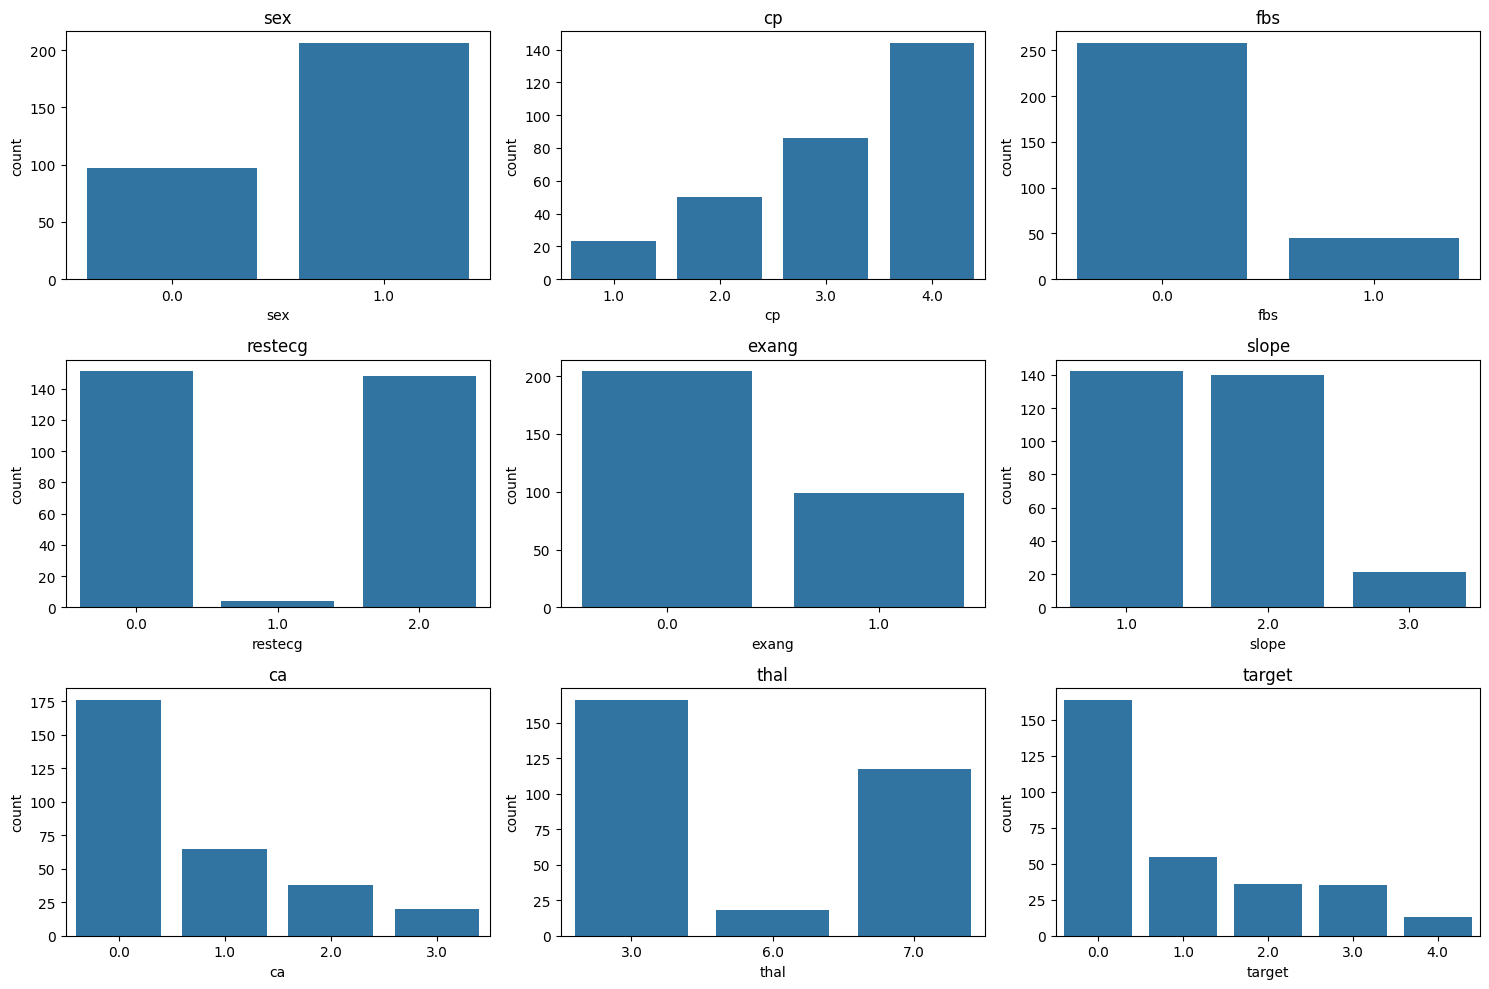

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'], start=1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()


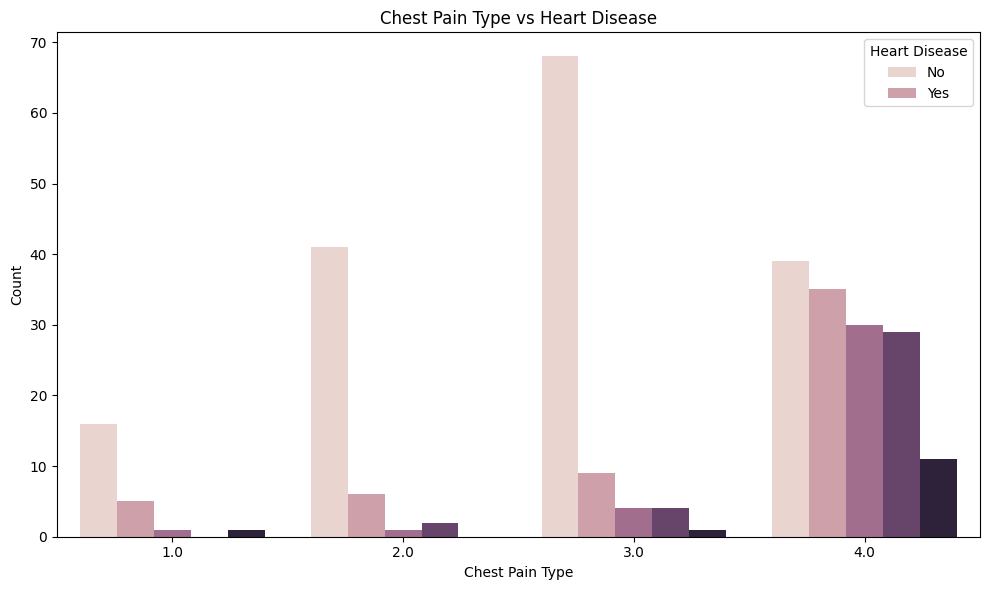

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


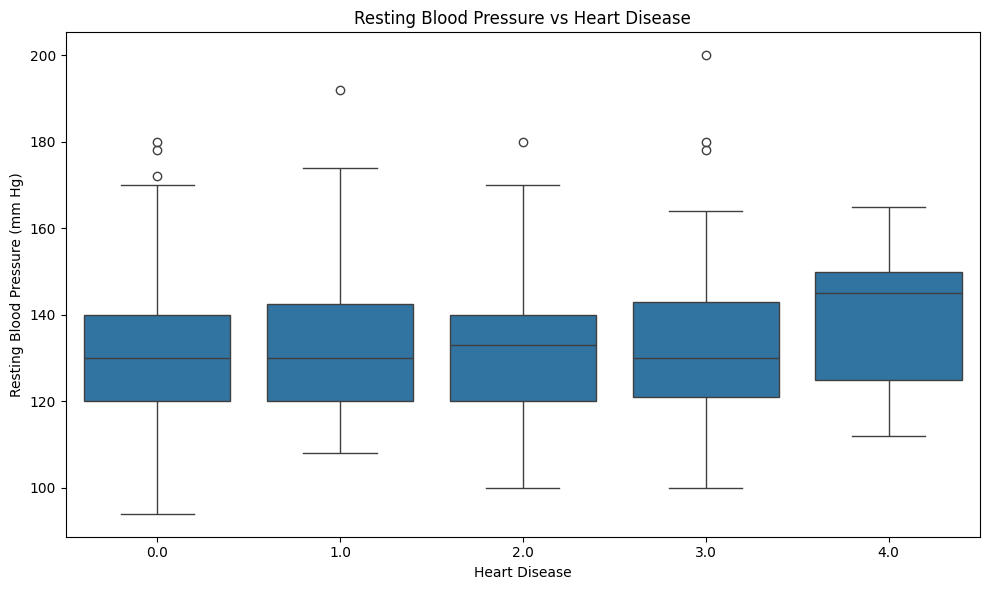

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='trestbps')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.tight_layout()
plt.show()


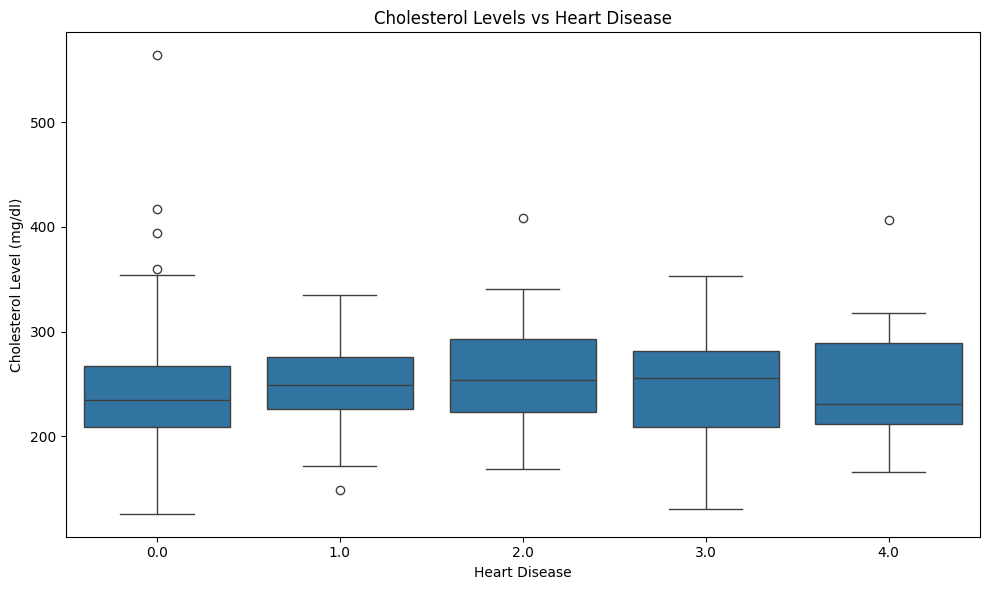

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='chol')
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.tight_layout()
plt.show()


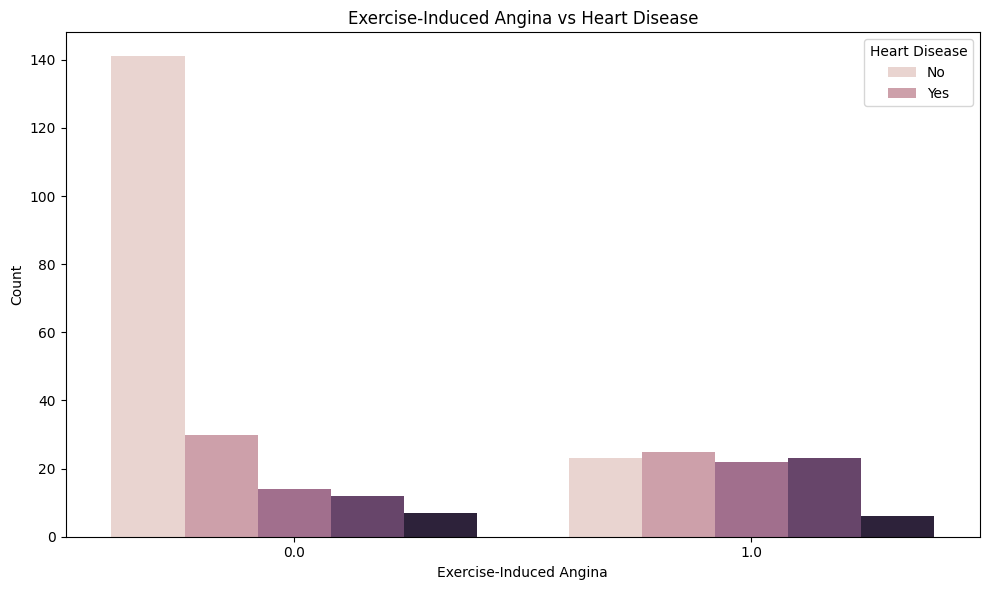

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='exang', hue='target')
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


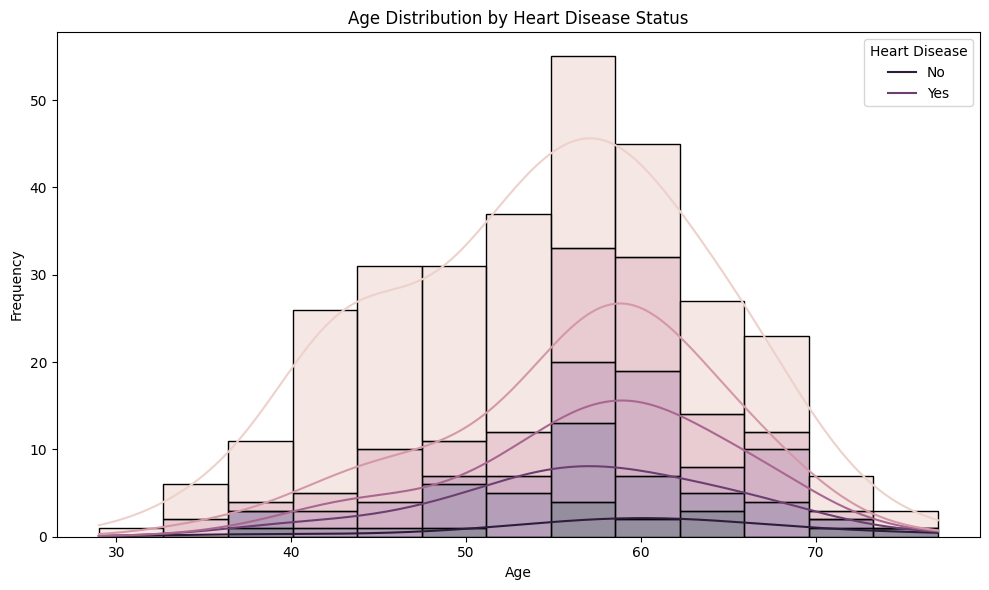

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


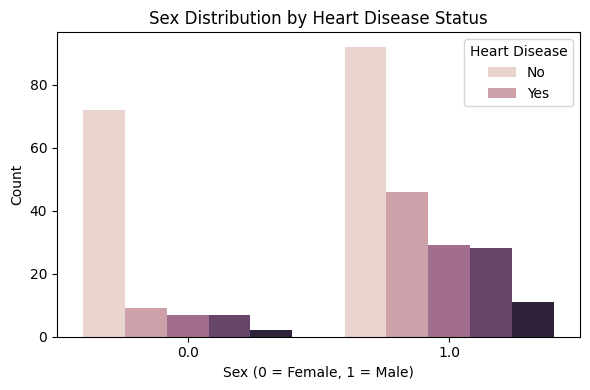

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sex', hue='target')
plt.title('Sex Distribution by Heart Disease Status')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


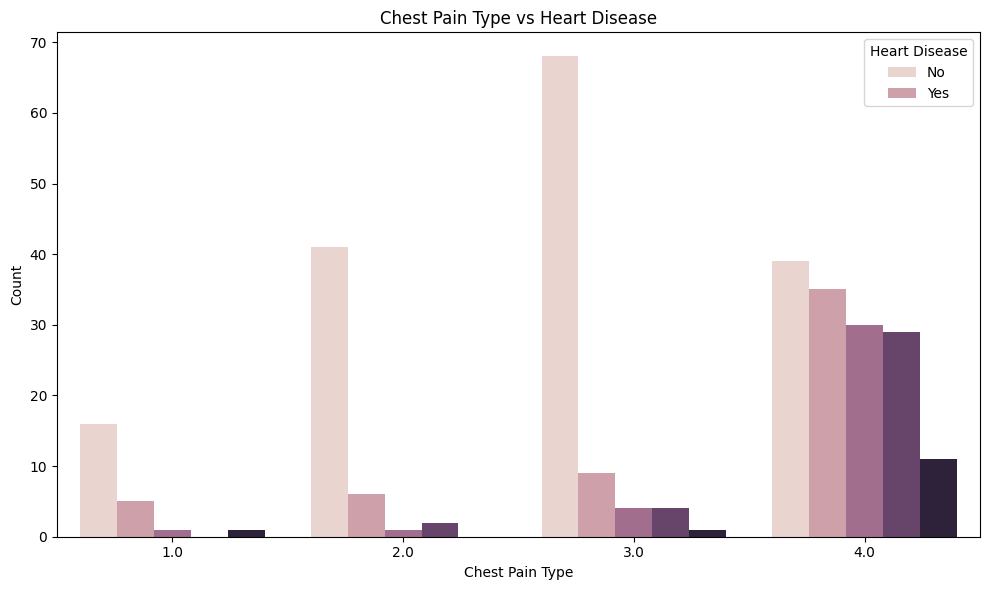

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


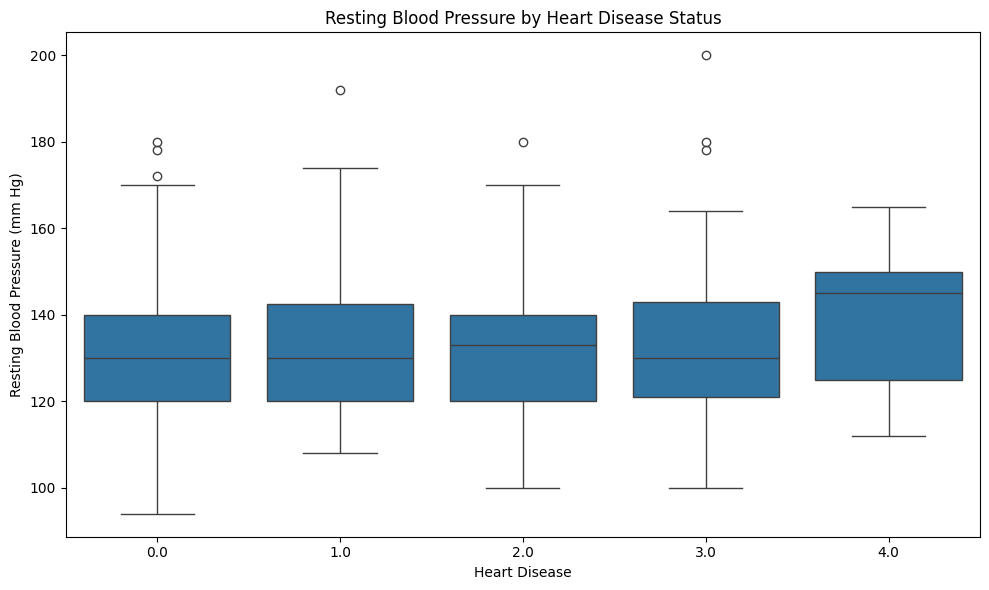

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='trestbps')
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.tight_layout()
plt.show()


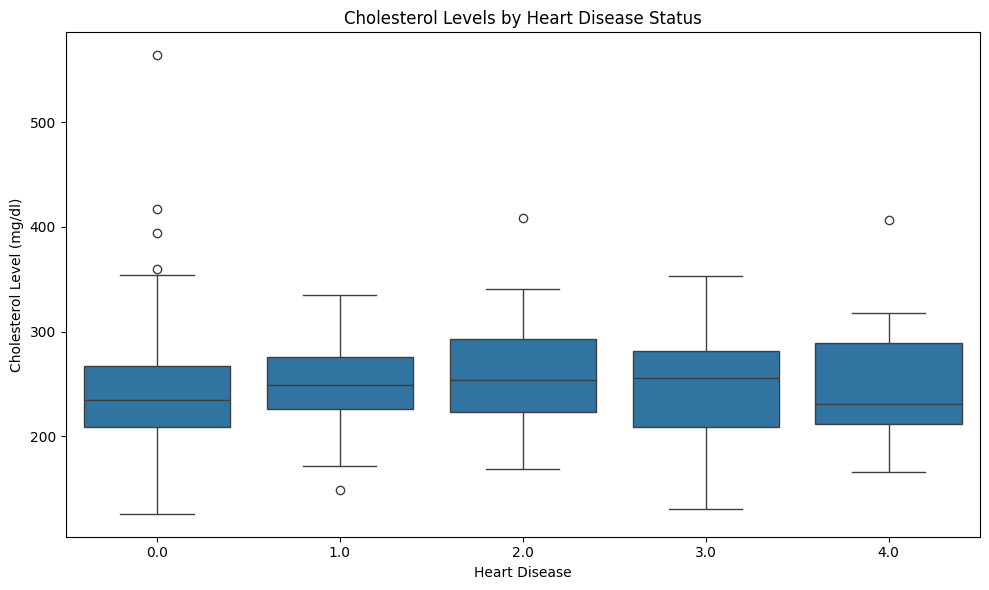

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.tight_layout()
plt.show()


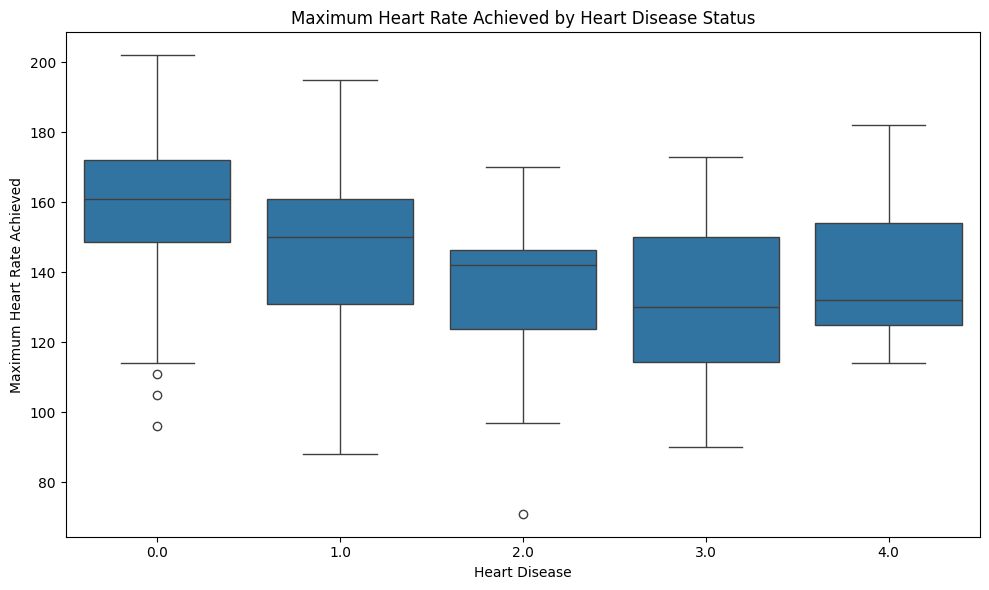

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='thalach')
plt.title('Maximum Heart Rate Achieved by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.tight_layout()
plt.show()


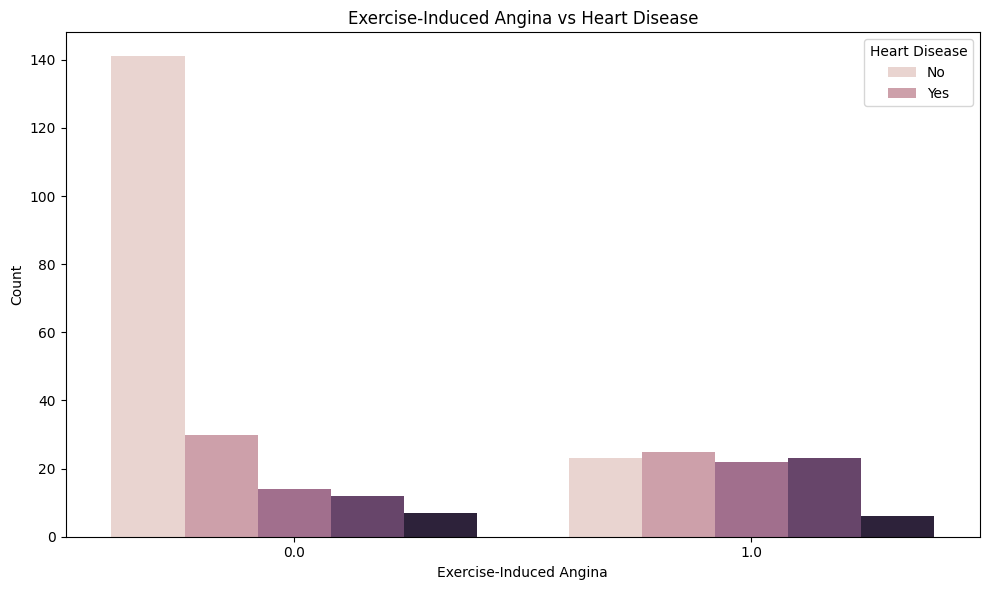

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='exang', hue='target')
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


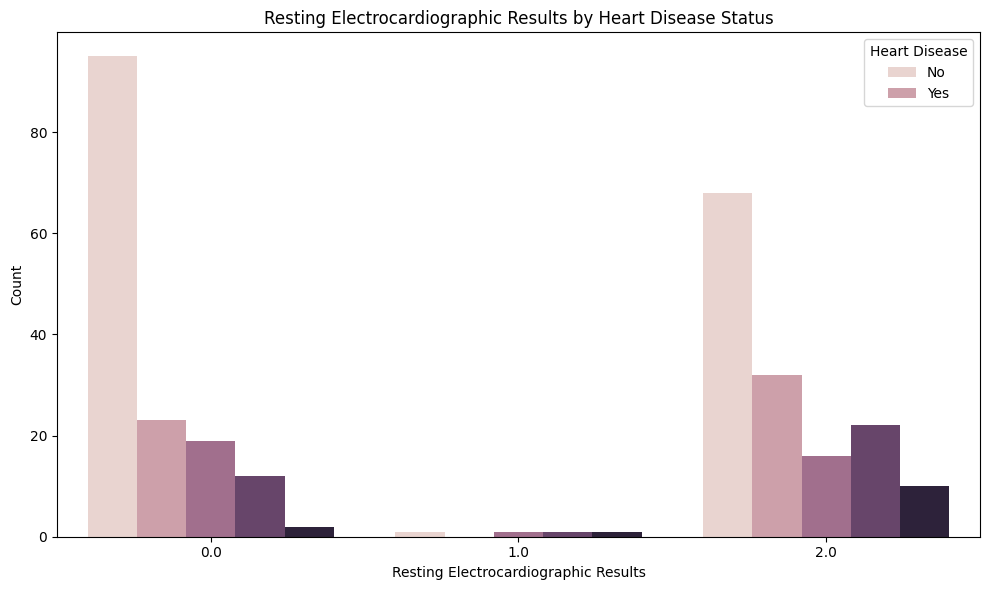

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='restecg', hue='target')
plt.title('Resting Electrocardiographic Results by Heart Disease Status')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


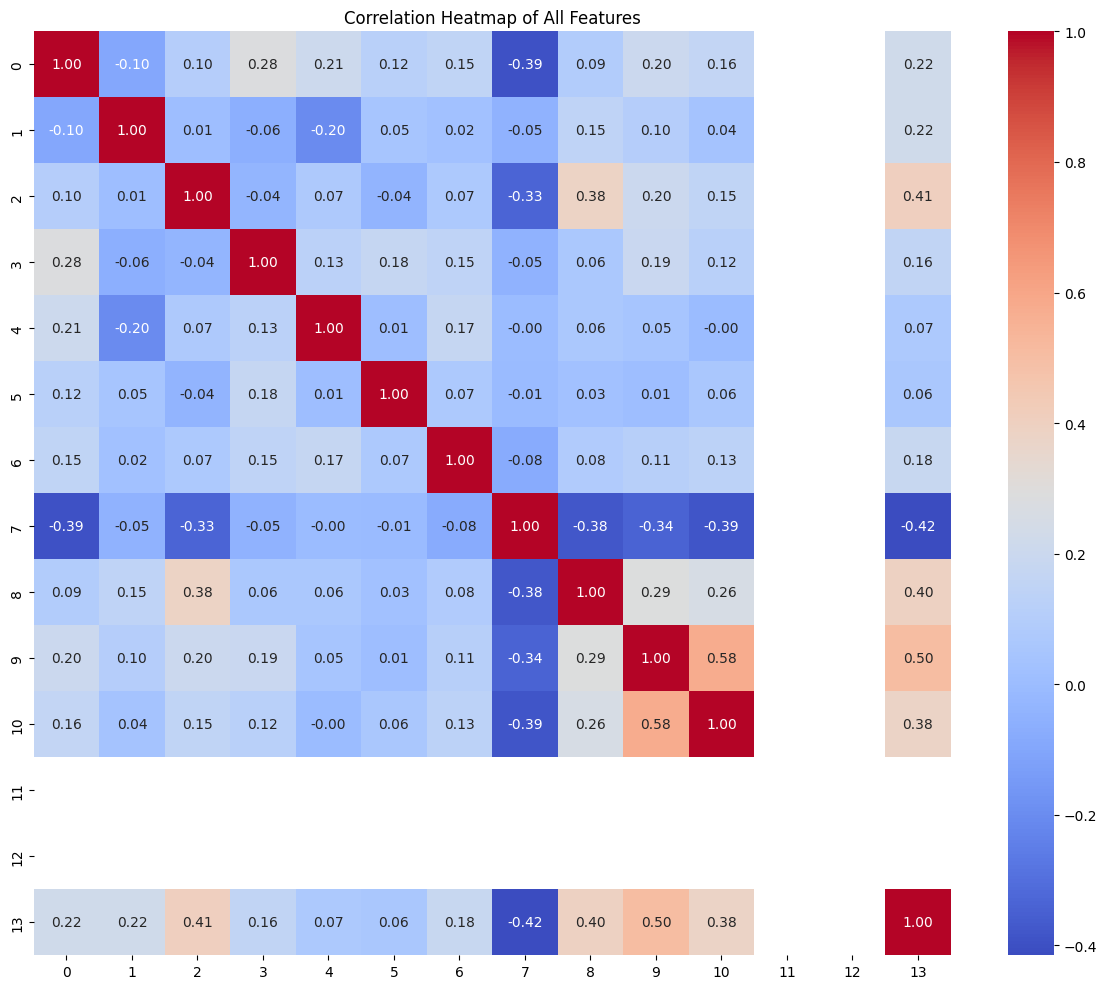

In [ ]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

#*Bivariate Analysis*
* **Explore relationships between pairs of numerical variables using scatter plots**

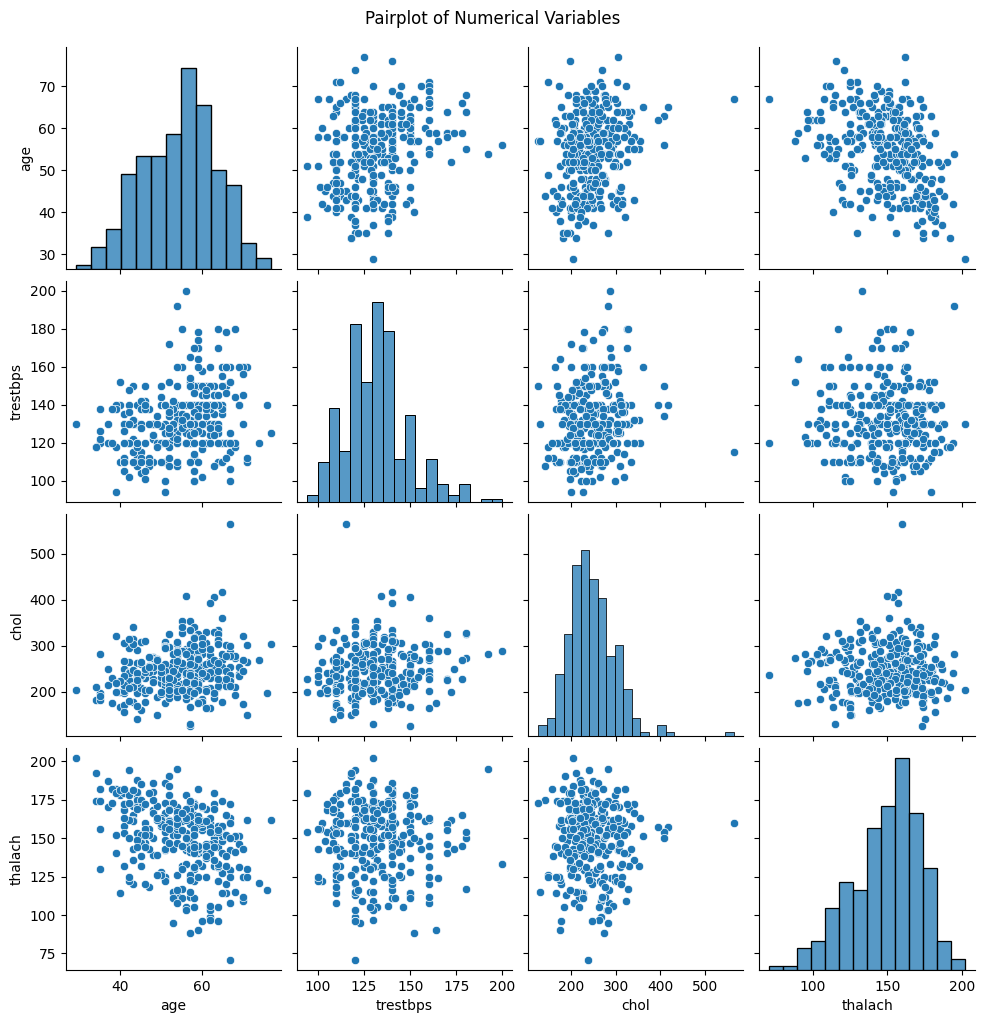

In [ ]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach']].to_pandas())
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [ ]:
skewness = data[['age', 'trestbps', 'chol', 'thalach']].to_pandas().skew()
print("Skewness:")
print(skewness)

Skewness:
age        -0.209060
trestbps    0.706035
chol        1.135503
thalach    -0.537449
dtype: float64


In [ ]:
correlation_matrix = data[['age', 'trestbps', 'chol', 'thalach']].to_pandas().corr(method='spearman')
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age  trestbps      chol   thalach
age       1.000000  0.292183  0.191253 -0.391633
trestbps  0.292183  1.000000  0.135837 -0.040401
chol      0.191253  0.135837  1.000000 -0.038301
thalach  -0.391633 -0.040401 -0.038301  1.000000


**Conclusion**
* The Cleveland Heart Disease Dataset offers a comprehensive collection of patient attributes and clinical indicators relevant to heart disease prediction. By leveraging this dataset and applying advanced analytical techniques, researchers and healthcare professionals can gain valuable insights into the factors influencing heart health and develop more accurate diagnostic and prognostic models.